# Artur Rybicki  --  Przewidywanie ceny domów
# Projekt zaliczeniowy  --  Sages Bootcamp Data Science ING

## Założenia projektu




### Temat 1: Przewidywanie ceny domów.

- **Cel projektu**: zastosowanie modeli regresji do przewidzenia ceny domu o podanych cechach.
- **Link do danych**: http://web.stanford.edu/class/stats191/data/ames2000_NAfix.csv
- **Dokładny opis danych**: http://web.stanford.edu/class/stats191/data/amesdoc.txt
- **Zmienna celu**: cena domu "SalePrice".

**Wymogi**:
    ● Musi zostać wykorzystany model regresji liniowej.
    ● Muszą zostać wykorzystane przynajmniej dwie inne metody regresji: regresja Ridge, regresja Lasso, drzewo regresyjne, las losowy regresyjny, XGBoost lub inne).
    ● Trzeba uwzględnić optymalizację modeli/pipelinów.
    ● Nie usuwamy żadnych obserwacji - braki danych uzupełniamy w jakiś sposób.
    ● Wszelkie nieoczywiste przekształcenia danych należy opatrzyć uzasadnieniem dlaczego dokonujemy tego przekształcenia (np. robimy wykres i uzasadniamy wzięci logarytmu ze zmiennej tym, że rozkła d jest skośny).
    ● Musi pojawić się ocena graficzna predykcji modeli (np. wykresy wartości przewidywanych od prawdziwych czy wykresy reziduów).
    ● Projekt musi być zakończony przejrzystym porównaniem przetestowanych rozwiązań (modeli/pipelinów) w postaci tabeli, gdzie jeden wiersz opisuje jedno rozwiązanie i jego wynik.
- **Forma przekazanie projektu do oceny**: 
    ● Projekt musi być umieszczony w repozytorium (publicznym) na githubie. 
    ● Projekt musi zawierać plik w formacie .ipynb (notebook Jupyter’owy), w którym znajdować się będzie cała realizacja projektu lub główna jego część przedstawiająca kluczowe elementy (dopuszczalne są ewentualne pliki pomocnicze pomagające zachować przejrzystość pliku głównego). 
    ● Dane mogą, ale nie muszą znajdować się w repozytorium. 
- Inne formy realizacji projektu nie są dopuszczalne - w szczególności przesłanie plików z rozwiązaniem nie jest traktowane jako rozwiązania. 
- Link do repozytorium z projektem należy przesłać na adres: n.ryciak@sages.com.pl
- Termin oddania projektu: nie później niż 14 dni od ostatniego dnia zajęć grupy, w której uczestniczył uczestnik.
- Aby projekt został zaliczony:
    - musi być poprawny pod względem merytorycznym (oznacza to np.: poprawną metodologicznie ocenę modeli czy rozsądne przygotowanie danych bez ewidentnych “błędów w sztuce”),
    - musi spełniać wymogi określone dla danego tematu,
    - musi mieć czytelną, przejrzystą formę umożliwiającą osobie sprawdzającej zrozumienie jego przebiegu. W szczególności niezbędne są komentarze i objaśnienia, które wyjaśniają poszczególne kroki. Projekty nieestetyczne/trudne w odbiorze/bez objaśnień słownych będą zwracane do poprawki.

- W przypadku niezaliczenia projektu za pierwszym podejściem, projekt zwracany jest do poprawki i można projekt przesłać ponownie w ciągu 14 dni od otrzymania informacji o niezaliczeniu pierwszego podejścia. Dalszej możliwości poprawy nie przewiduje się.

## Projekt

### Przygotowanie pracy

#### Import podstawowych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####    Ustawienia

In [2]:
# ustawienia wyswietlania
pd.set_option('display.max_rows', 111)    # ustawienie ilosci wyswietlanych wierszy
pd.set_option('display.max_columns', 111)    # ustawienie ilosci wyswietlanych kolumn
print("max rows to show:", pd.get_option('display.max_rows'),    # pokazanie obecnych ustawien
      "    ",
      "max cols to show:", pd.get_option('display.max_columns'))

max rows to show: 111      max cols to show: 111


In [3]:
# funkcja ktora umozliwi przegladanie ram danych
def f_dfPrev(df):
    print(f'''Ilość wierszy [{df.shape[0]}].
Lista kolumn, których jest łącznie [{df.shape[1]}]:
 {list(enumerate((df.columns), start=1))}
Łączna ilość braków (nan): [{df.isna().sum().sum()}]''')
    for i in range(0, df.shape[1]):
        print(f'''
{i+1}.Kolumna: [{df.columns[i]}], ilość braków (nan): [{df.iloc[:,i].isna().sum()}], typ danych: [{df.iloc[:,i].dtypes}], ilość unikatów: [{df.iloc[:,i].nunique()}]''')
        if df.iloc[:,i].nunique()<66:    #zakladam ze jesli jest wiecej niz tyle unikatow to nie sa to kategorie
            print(f'''lista unikatów: {df.iloc[:,i].unique()}''')
        else:
            print(f'''przykładowe wartości: {df.iloc[:,i].unique()[:33]}''')

###    Przygotowanie danych

#### Zaczytanie dostępnych danych do ramy danych i jej weryfikacja

In [4]:
# import danych do ramy danych 
df_data = pd.read_csv('ames2000_NAfix.csv')

In [5]:
# czolowka ramy danych
df_data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,1Story,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Stone,182,Gd,TA,PConc,Gd,TA,Av,ALQ,866,Unf,0,436,1302,GasA,Ex,Y,SBrkr,1302,0,0,1302,1,0,1,1,1,1,Gd,5,Typ,1,Gd,Attchd,2005,RFn,2,631,TA,TA,Y,110,50,0,0,0,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Nonemes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,TA,TA,No,ALQ,804,Rec,78,0,882,GasA,TA,Y,SBrkr,882,0,0,882,1,0,1,0,2,1,TA,4,Typ,0,None,Attchd,1970,Fin,2,525,TA,TA,Y,240,0,0,0,0,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SFoyer,5,8,1972,2003,Gable,CompShg,WdShing,HdBoard,None,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,660,Unf,0,108,768,GasA,Gd,Y,SBrkr,768,0,0,768,0,1,1,0,2,1,TA,5,Typ,0,None,Detchd,1974,Fin,1,396,TA,TA,Y,192,0,0,0,0,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,None,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,1249,1347,0,2596,0,0,3,1,4,1,Gd,9,Typ,0,None,Attchd,2006,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,None,None,None,0,9,2006,New,Partial,342643


In [6]:
# przejrzenie ramy danych
f_dfPrev(df_data)

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [80]:
 [(1, 'MS.SubClass'), (2, 'MS.Zoning'), (3, 'Lot.Frontage'), (4, 'Lot.Area'), (5, 'Street'), (6, 'Alley'), (7, 'Lot.Shape'), (8, 'Land.Contour'), (9, 'Utilities'), (10, 'Lot.Config'), (11, 'Land.Slope'), (12, 'Neighborhood'), (13, 'Condition.1'), (14, 'Condition.2'), (15, 'Bldg.Type'), (16, 'House.Style'), (17, 'Overall.Qual'), (18, 'Overall.Cond'), (19, 'Year.Built'), (20, 'Year.Remod.Add'), (21, 'Roof.Style'), (22, 'Roof.Matl'), (23, 'Exterior.1st'), (24, 'Exterior.2nd'), (25, 'Mas.Vnr.Type'), (26, 'Mas.Vnr.Area'), (27, 'Exter.Qual'), (28, 'Exter.Cond'), (29, 'Foundation'), (30, 'Bsmt.Qual'), (31, 'Bsmt.Cond'), (32, 'Bsmt.Exposure'), (33, 'BsmtFin.Type.1'), (34, 'BsmtFin.SF.1'), (35, 'BsmtFin.Type.2'), (36, 'BsmtFin.SF.2'), (37, 'Bsmt.Unf.SF'), (38, 'Total.Bsmt.SF'), (39, 'Heating'), (40, 'Heating.QC'), (41, 'Central.Air'), (42, 'Electrical'), (43, 'X1st.Flr.SF'), (44, 'X2nd.Flr.SF'), (45, 'Low.Qual.Fin.SF'), (46, 'Gr.Liv

> W ramie danych występują braki, trzeba je usunąć

#### Usuwanie braków

In [7]:
# lista kolumn z brakami
l_colsWithNaNs = list(df_data.loc[:, (df_data.isna().sum()>0)].isna().sum().index)

In [8]:
# przeglad kolumn z brakami w ramie danych
f_dfPrev(df_data[l_colsWithNaNs])

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [9]:
 [(1, 'Mas.Vnr.Type'), (2, 'Bsmt.Qual'), (3, 'Bsmt.Cond'), (4, 'Bsmt.Exposure'), (5, 'BsmtFin.Type.1'), (6, 'BsmtFin.Type.2'), (7, 'Garage.Finish'), (8, 'Garage.Qual'), (9, 'Garage.Cond')]
Łączna ilość braków (nan): [28]

1.Kolumna: [Mas.Vnr.Type], ilość braków (nan): [16], typ danych: [object], ilość unikatów: [5]
lista unikatów: ['Stone' 'None' 'BrkFace' nan 'BrkCmn' 'CBlock']

2.Kolumna: [Bsmt.Qual], ilość braków (nan): [1], typ danych: [object], ilość unikatów: [6]
lista unikatów: ['Gd' 'TA' 'None' 'Ex' 'Fa' nan 'Po']

3.Kolumna: [Bsmt.Cond], ilość braków (nan): [1], typ danych: [object], ilość unikatów: [6]
lista unikatów: ['TA' 'None' 'Gd' 'Fa' 'Ex' nan 'Po']

4.Kolumna: [Bsmt.Exposure], ilość braków (nan): [3], typ danych: [object], ilość unikatów: [5]
lista unikatów: ['Av' 'No' 'None' 'Gd' 'Mn' nan]

5.Kolumna: [BsmtFin.Type.1], ilość braków (nan): [1], typ danych: [object], ilość unikatów: [7]
lista unikatów: ['ALQ'

> Ze względu na małą ilość braków zastąpię je najczęstszymi wartościami. 

        Dla kolumny 'Mas.Vnr.Type', gdzie jest 16 braków, jest następujący opis w dokumentacji:
            "Mas Vnr Type (Nominal): Masonry veneer type
                BrkCmn	  Brick Common
                BrkFace	 Brick Face
                CBlock	  Cinder Block
                None	    None
                Stone	   Stone"
                
> Wynika z niego, że ze względów statystycznych, można tu też podstawić wartości najczęstsze.

In [9]:
# podstawiam wartosci najczestsze pod braki
for i in l_colsWithNaNs:
    df_data = df_data.fillna(df_data[i].value_counts().index[0])

In [10]:
# ponowny przeglad kontrolny kolumn pierwotnie z brakami w uzupelnionej juz ramie danych
f_dfPrev(df_data[l_colsWithNaNs])

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [9]:
 [(1, 'Mas.Vnr.Type'), (2, 'Bsmt.Qual'), (3, 'Bsmt.Cond'), (4, 'Bsmt.Exposure'), (5, 'BsmtFin.Type.1'), (6, 'BsmtFin.Type.2'), (7, 'Garage.Finish'), (8, 'Garage.Qual'), (9, 'Garage.Cond')]
Łączna ilość braków (nan): [0]

1.Kolumna: [Mas.Vnr.Type], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [5]
lista unikatów: ['Stone' 'None' 'BrkFace' 'BrkCmn' 'CBlock']

2.Kolumna: [Bsmt.Qual], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [6]
lista unikatów: ['Gd' 'TA' 'None' 'Ex' 'Fa' 'Po']

3.Kolumna: [Bsmt.Cond], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [6]
lista unikatów: ['TA' 'None' 'Gd' 'Fa' 'Ex' 'Po']

4.Kolumna: [Bsmt.Exposure], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [5]
lista unikatów: ['Av' 'No' 'None' 'Gd' 'Mn']

5.Kolumna: [BsmtFin.Type.1], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [7]
lista unikatów: ['ALQ' 'GLQ' 'None' 'Unf

In [11]:
# suma brakow w podstawowej ramie danych
df_data.isna().sum().sum()

0

> W podstawowej ramie danych nie ma już braków

#### Weryfikacja typów danych w kolumnach i ich dostosowanie

    Trzeba zapewnić, by typy danych w kolumnach były właściwe dla danych, które tam występują.

In [12]:
# zestawienie typow wartosci kolumn i ilosci ich unikatow, sortowanie wg typu, nastepnie ilosci unikatow
df_dataDTypesNUniques = pd.concat([df_data.dtypes, df_data.nunique()], axis =1).sort_values(by=[0,1], ascending=False)
df_dataDTypesNUniques

,0,1
Bsmt.Unf.SF,object,928
Total.Bsmt.SF,object,871
BsmtFin.SF.1,object,817
Garage.Area,object,531
Mas.Vnr.Area,object,363
BsmtFin.SF.2,object,212
Lot.Frontage,object,121
Garage.Yr.Blt,object,101
Neighborhood,object,27
Exterior.2nd,object,16


In [13]:
# przegladam rame danych zgodnie z powyzsza kolejnoscia
f_dfPrev(df_data[df_dataDTypesNUniques.index])

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [80]:
 [(1, 'Bsmt.Unf.SF'), (2, 'Total.Bsmt.SF'), (3, 'BsmtFin.SF.1'), (4, 'Garage.Area'), (5, 'Mas.Vnr.Area'), (6, 'BsmtFin.SF.2'), (7, 'Lot.Frontage'), (8, 'Garage.Yr.Blt'), (9, 'Neighborhood'), (10, 'Exterior.2nd'), (11, 'Exterior.1st'), (12, 'Sale.Type'), (13, 'Condition.1'), (14, 'House.Style'), (15, 'MS.Zoning'), (16, 'Condition.2'), (17, 'Roof.Matl'), (18, 'BsmtFin.Type.1'), (19, 'BsmtFin.Type.2'), (20, 'Functional'), (21, 'Garage.Type'), (22, 'Garage.Cars'), (23, 'Roof.Style'), (24, 'Foundation'), (25, 'Bsmt.Qual'), (26, 'Bsmt.Cond'), (27, 'Heating'), (28, 'Fireplace.Qu'), (29, 'Garage.Qual'), (30, 'Garage.Cond'), (31, 'Sale.Condition'), (32, 'Lot.Config'), (33, 'Bldg.Type'), (34, 'Mas.Vnr.Type'), (35, 'Bsmt.Exposure'), (36, 'Heating.QC'), (37, 'Bsmt.Full.Bath'), (38, 'Pool.QC'), (39, 'Fence'), (40, 'Misc.Feature'), (41, 'Lot.Shape'), (42, 'Land.Contour'), (43, 'Exter.Qual'), (44, 'Exter.Cond'), (45, 'Electrical'), (46, '

lista unikatów: ['TA' 'Gd' 'Fa' 'Ex']

45.Kolumna: [Electrical], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [4]
lista unikatów: ['SBrkr' 'FuseA' 'FuseP' 'FuseF']

46.Kolumna: [Bsmt.Half.Bath], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [4]
lista unikatów: ['0' '1' '2' 'None']

47.Kolumna: [Kitchen.Qual], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [4]
lista unikatów: ['Gd' 'TA' 'Fa' 'Ex']

48.Kolumna: [Garage.Finish], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [4]
lista unikatów: ['RFn' 'Fin' 'Unf' 'None']

49.Kolumna: [Alley], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [3]
lista unikatów: ['None' 'Grvl' 'Pave']

50.Kolumna: [Land.Slope], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [3]
lista unikatów: ['Gtl' 'Sev' 'Mod']

51.Kolumna: [Paved.Drive], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [3]
lista unikatów: ['Y' 'N' 'P']

52.Kolumna: [Street], ilo

>Na podstawie powyższego przeglądu wynika, że są kolumny tekstowe które powinny być liczbowe

In [14]:
# tworze liste kolumn tekstowych do zamiany na liczbowe
l_colsObjToNbr = ['Bsmt.Unf.SF', 'Total.Bsmt.SF', 'BsmtFin.SF.1', 'Garage.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.2', 'Lot.Frontage', 'Garage.Yr.Blt']

In [15]:
# przeglad ramy danych wg ww listy
f_dfPrev(df_data[l_colsObjToNbr])

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [8]:
 [(1, 'Bsmt.Unf.SF'), (2, 'Total.Bsmt.SF'), (3, 'BsmtFin.SF.1'), (4, 'Garage.Area'), (5, 'Mas.Vnr.Area'), (6, 'BsmtFin.SF.2'), (7, 'Lot.Frontage'), (8, 'Garage.Yr.Blt')]
Łączna ilość braków (nan): [0]

1.Kolumna: [Bsmt.Unf.SF], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [928]
przykładowe wartości: ['436' '0' '108' '1249' '560' '576' '125' '634' '912' '894' '305' '869'
 '970' '636' '1836' '195' '497' '526' '726' '1615' '100' '768' '253' '94'
 '398' '1028' '440' '34' '331' '240' '860' '210' '466']

2.Kolumna: [Total.Bsmt.SF], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [871]
przykładowe wartości: ['1302' '882' '768' '0' '1249' '560' '966' '576' '1525' '707' '912' '1013'
 '894' '995' '1092' '869' '970' '2320' '1860' '728' '988' '1800' '1536'
 '1615' '654' '1160' '1044' '1127' '608' '1284' '440' '1187' '1144']

3.Kolumna: [BsmtFin.SF.1], ilość braków (nan): [0], typ danych: [object], ilość 

> W niektórych kolumnach tekstowych, które powinny być numeryczne występują oprócz zera również wartości 'None'.
> Trzeba sprawdzić, dokładnie gdzie one występują.

In [16]:
# wyswietlam ile wystepuje wartosci 'None' wsrod kolumn tekstowych do zamiany na liczbowe
(df_data[l_colsObjToNbr]=='None').sum()

Bsmt.Unf.SF        1
Total.Bsmt.SF      1
BsmtFin.SF.1       1
Garage.Area        1
Mas.Vnr.Area      16
BsmtFin.SF.2       1
Lot.Frontage     334
Garage.Yr.Blt    112
dtype: int64

> Dla większości kolumn 'None' zastąpię 0.

    Dla kolumny Garage.Yr.Blt z 112 'None' opis w dokumentacji:
            Garage Yr Blt (Discrete): Year garage was built
> przeprowadzam analizę porównawczą z innymi danymi garażu.

In [17]:
# wyswietlam inne dane garazu dla wierszy gdzie 'Garage.Yr.Blt' jest wartoscia 'None'
df_data.loc[df_data['Garage.Yr.Blt']=='None', ['Garage.Area', 'Garage.Cars' , 'Garage.Cond' ,'Garage.Finish', 'Garage.Qual', 'Garage.Type', 'Garage.Yr.Blt']].head(11)

,Garage.Area,Garage.Cars,Garage.Cond,Garage.Finish,Garage.Qual,Garage.Type,Garage.Yr.Blt
9,0,0,None,None,None,None,None
12,0,0,None,None,None,None,None
36,0,0,None,None,None,None,None
77,0,0,None,None,None,None,None
86,0,0,None,None,None,None,None
97,0,0,None,None,None,None,None
102,0,0,None,None,None,None,None
103,0,0,None,None,None,None,None
137,0,0,None,None,None,None,None
153,0,0,None,None,None,None,None


> Wynika z tego, że dla 'None' w kolumnie Garage.Yr.Blt też przyjmę wartość zero

In [18]:
# zamiana 'None' na zero i zamiana kolumny tekstowej na liczbowa
for i in l_colsObjToNbr:
    df_data.loc[df_data[i]=='None', i] = '0'
    df_data[i] = df_data[i].astype('int64')

In [19]:
f_dfPrev(df_data[l_colsObjToNbr])

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [8]:
 [(1, 'Bsmt.Unf.SF'), (2, 'Total.Bsmt.SF'), (3, 'BsmtFin.SF.1'), (4, 'Garage.Area'), (5, 'Mas.Vnr.Area'), (6, 'BsmtFin.SF.2'), (7, 'Lot.Frontage'), (8, 'Garage.Yr.Blt')]
Łączna ilość braków (nan): [0]

1.Kolumna: [Bsmt.Unf.SF], ilość braków (nan): [0], typ danych: [int64], ilość unikatów: [927]
przykładowe wartości: [ 436    0  108 1249  560  576  125  634  912  894  305  869  970  636
 1836  195  497  526  726 1615  100  768  253   94  398 1028  440   34
  331  240  860  210  466]

2.Kolumna: [Total.Bsmt.SF], ilość braków (nan): [0], typ danych: [int64], ilość unikatów: [870]
przykładowe wartości: [1302  882  768    0 1249  560  966  576 1525  707  912 1013  894  995
 1092  869  970 2320 1860  728  988 1800 1536 1615  654 1160 1044 1127
  608 1284  440 1187 1144]

3.Kolumna: [BsmtFin.SF.1], ilość braków (nan): [0], typ danych: [int64], ilość unikatów: [816]
przykładowe wartości: [ 866  804  660    0   51 1400   73  249  595

In [20]:
# wyswietlam ile wystepuje wartosci 'None' wsrod kolumn zamienonych na liczbowe
(df_data[l_colsObjToNbr]=='None').sum()

C:\Users\msi\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Bsmt.Unf.SF      0
Total.Bsmt.SF    0
BsmtFin.SF.1     0
Garage.Area      0
Mas.Vnr.Area     0
BsmtFin.SF.2     0
Lot.Frontage     0
Garage.Yr.Blt    0
dtype: int64

In [21]:
# weryfikacja zamiany, zestawienie typow wartosci kolumn i ilosci ich unikatow, sortowanie wg typu, nastepnie ilosci unikatow
df_dataDTypesNUniques = pd.concat([df_data.dtypes, df_data.nunique()], axis =1).sort_values(by=[0,1], ascending=False)
df_dataDTypesNUniques

,0,1
Neighborhood,object,27
Exterior.2nd,object,16
Exterior.1st,object,14
Sale.Type,object,10
Condition.1,object,9
House.Style,object,8
MS.Zoning,object,7
Condition.2,object,7
Roof.Matl,object,7
BsmtFin.Type.1,object,7


> Wynika z tego, że zamiana danych de facto liczbowych, ale przedstawianych tekstowo, na dane liczbowe jest wykonana skutecznie

##### Uporządkowane dane kategorycznych i ich zamiana na wartości liczbowe

W podstawowej ramie danych występują dane kategoryczne uporządkowane i nie uporządkowane

    Określę które dane kategoryczne są uporządkowane, i powinny być przekształcone na dane liczbowe w hierarchiczny sposób, a które nie, i mogą być przekształcone swobodnie

In [22]:
# lista danych uporzadkowanych z dokumentacji
l_colsOrd = ['Lot.Shape', 'Utilities', 'Land.Slope', 'Overall.Qual', 'Overall.Cond', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating.QC', 'Electrical', 'Kitchen.Qual', 'Functional', 'Fireplace.Qu', 'Garage.Finish','Garage.Qual', 'Garage.Cond', 'Paved.Drive', 'Pool.QC', 'Fence']  

In [23]:
# przejrzenie danych uporządkowanych w ramie danych
f_dfPrev(df_data[l_colsOrd])

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [23]:
 [(1, 'Lot.Shape'), (2, 'Utilities'), (3, 'Land.Slope'), (4, 'Overall.Qual'), (5, 'Overall.Cond'), (6, 'Exter.Qual'), (7, 'Exter.Cond'), (8, 'Bsmt.Qual'), (9, 'Bsmt.Cond'), (10, 'Bsmt.Exposure'), (11, 'BsmtFin.Type.1'), (12, 'BsmtFin.Type.2'), (13, 'Heating.QC'), (14, 'Electrical'), (15, 'Kitchen.Qual'), (16, 'Functional'), (17, 'Fireplace.Qu'), (18, 'Garage.Finish'), (19, 'Garage.Qual'), (20, 'Garage.Cond'), (21, 'Paved.Drive'), (22, 'Pool.QC'), (23, 'Fence')]
Łączna ilość braków (nan): [0]

1.Kolumna: [Lot.Shape], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [4]
lista unikatów: ['Reg' 'IR1' 'IR2' 'IR3']

2.Kolumna: [Utilities], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [1]
lista unikatów: ['AllPub']

3.Kolumna: [Land.Slope], ilość braków (nan): [0], typ danych: [object], ilość unikatów: [3]
lista unikatów: ['Gtl' 'Sev' 'Mod']

4.Kolumna: [Overall.Qual], ilość braków (nan): [0], typ d

> Wynika z tego, że dane w kolumnach 'Overall.Qual' i 'Overall.Cond' są już numeryczne
> Natomiast kolumna 'Utilities' ma tylko jedną cechę, która zawsze występuje w każdym wierszu

    Trzeba usunąć kolumnę 'Utilities' ponieważ prównawczo nie wnosi nic do analizy i modelu

In [24]:
# usuniecie kolumny 'Utilities'
df_data.pop('Utilities')

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
5       AllPub
6       AllPub
7       AllPub
8       AllPub
9       AllPub
10      AllPub
11      AllPub
12      AllPub
13      AllPub
14      AllPub
15      AllPub
16      AllPub
17      AllPub
18      AllPub
19      AllPub
20      AllPub
21      AllPub
22      AllPub
23      AllPub
24      AllPub
25      AllPub
26      AllPub
27      AllPub
28      AllPub
29      AllPub
30      AllPub
31      AllPub
32      AllPub
33      AllPub
34      AllPub
35      AllPub
36      AllPub
37      AllPub
38      AllPub
39      AllPub
40      AllPub
41      AllPub
42      AllPub
43      AllPub
44      AllPub
45      AllPub
46      AllPub
47      AllPub
48      AllPub
49      AllPub
50      AllPub
51      AllPub
52      AllPub
53      AllPub
54      AllPub
         ...  
1945    AllPub
1946    AllPub
1947    AllPub
1948    AllPub
1949    AllPub
1950    AllPub
1951    AllPub
1952    AllPub
1953    AllPub
1954    AllPub
1955    Al

In [25]:
# eryfikacja listy kolumn
sorted(df_data.columns)

['Alley',
 'Bedroom.AbvGr',
 'Bldg.Type',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Bsmt.Qual',
 'Bsmt.Unf.SF',
 'BsmtFin.SF.1',
 'BsmtFin.SF.2',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Central.Air',
 'Condition.1',
 'Condition.2',
 'Electrical',
 'Enclosed.Porch',
 'Exter.Cond',
 'Exter.Qual',
 'Exterior.1st',
 'Exterior.2nd',
 'Fence',
 'Fireplace.Qu',
 'Fireplaces',
 'Foundation',
 'Full.Bath',
 'Functional',
 'Garage.Area',
 'Garage.Cars',
 'Garage.Cond',
 'Garage.Finish',
 'Garage.Qual',
 'Garage.Type',
 'Garage.Yr.Blt',
 'Gr.Liv.Area',
 'Half.Bath',
 'Heating',
 'Heating.QC',
 'House.Style',
 'Kitchen.AbvGr',
 'Kitchen.Qual',
 'Land.Contour',
 'Land.Slope',
 'Lot.Area',
 'Lot.Config',
 'Lot.Frontage',
 'Lot.Shape',
 'Low.Qual.Fin.SF',
 'MS.SubClass',
 'MS.Zoning',
 'Mas.Vnr.Area',
 'Mas.Vnr.Type',
 'Misc.Feature',
 'Misc.Val',
 'Mo.Sold',
 'Neighborhood',
 'Open.Porch.SF',
 'Overall.Cond',
 'Overall.Qual',
 'Paved.Drive',
 'Pool.Area',
 'Pool.QC',
 '

> Wynika z tego, że kolumna 'Utilities' jest już usunięta

    W związku z powyższym, z wcześniej analizowanej listy kolumn do zamiany z danych kategorycznych na liczbowe trzeba usunąć kolumny 'Utilities', 'Overall.Qual', 'Overall.Cond'

In [26]:
# aktualizacja listy kolumn kategorycznych
l_colsOrdToNbr = l_colsOrd
for i in ['Utilities', 'Overall.Qual', 'Overall.Cond']:    # usuwam te kolumny z listy bo 'Utilities' juz jest usunieta a pozostale bo sa numeryczne
    l_colsOrdToNbr.remove(i)
l_colsOrdToNbr    

['Lot.Shape',
 'Land.Slope',
 'Exter.Qual',
 'Exter.Cond',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Heating.QC',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Fireplace.Qu',
 'Garage.Finish',
 'Garage.Qual',
 'Garage.Cond',
 'Paved.Drive',
 'Pool.QC',
 'Fence']

    Zgodnie z dokumentacją, trzeba podstawić odpowiednie zhierarchizowane warości numeryczne w kolumnach kategorycznych uporządkowanych

In [27]:
# lista wartosci kolumn kategorycznych do zamiany na wartosci liczbowe
l_colsOrdToNbrVal = [{'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}, 
    {'Sev':0, 'Mod':1, 'Gtl':2}, 
    {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
    {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},               
    {'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4},
    {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}, 
    {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7},
    {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    {'None':0, 'Unf':1, 'RFn':2, 'Fin':3},
    {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    {'N':0, 'P':1, 'Y':2},
    {'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    {'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}]

In [28]:
# slownik kolumn kategorycznych i ich wartosci do zamiany na wartosci liczbowe
d_colsOrdToNbrVal = dict(zip(l_colsOrdToNbr, l_colsOrdToNbrVal))
d_colsOrdToNbrVal

{'Lot.Shape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3},
 'Land.Slope': {'Sev': 0, 'Mod': 1, 'Gtl': 2},
 'Exter.Qual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'Exter.Cond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'Bsmt.Qual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'Bsmt.Cond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'Bsmt.Exposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
 'BsmtFin.Type.1': {'None': 0,
  'Unf': 1,
  'LwQ': 2,
  'Rec': 3,
  'BLQ': 4,
  'ALQ': 5,
  'GLQ': 6},
 'BsmtFin.Type.2': {'None': 0,
  'Unf': 1,
  'LwQ': 2,
  'Rec': 3,
  'BLQ': 4,
  'ALQ': 5,
  'GLQ': 6},
 'Heating.QC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'Electrical': {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4},
 'Kitchen.Qual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
 'Functional': {'Sal': 0,
  'Sev': 1,
  'Maj2': 2,
  'Maj1': 3,
  'Mod': 4,
  'Min2': 5,
  'Min1': 6,
  'Typ': 7},
 'Fireplace.Qu': {'None': 0, 'Po': 1, 

In [29]:
# zamiana wartosci tekstowych kolumn kategorycznych na ich wartosci liczbowe
df_data.replace(to_replace=d_colsOrdToNbrVal, inplace=True)

In [30]:
# weryfikacja zamiany
f_dfPrev(df_data[l_colsOrdToNbr])

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [20]:
 [(1, 'Lot.Shape'), (2, 'Land.Slope'), (3, 'Exter.Qual'), (4, 'Exter.Cond'), (5, 'Bsmt.Qual'), (6, 'Bsmt.Cond'), (7, 'Bsmt.Exposure'), (8, 'BsmtFin.Type.1'), (9, 'BsmtFin.Type.2'), (10, 'Heating.QC'), (11, 'Electrical'), (12, 'Kitchen.Qual'), (13, 'Functional'), (14, 'Fireplace.Qu'), (15, 'Garage.Finish'), (16, 'Garage.Qual'), (17, 'Garage.Cond'), (18, 'Paved.Drive'), (19, 'Pool.QC'), (20, 'Fence')]
Łączna ilość braków (nan): [0]

1.Kolumna: [Lot.Shape], ilość braków (nan): [0], typ danych: [int64], ilość unikatów: [4]
lista unikatów: [3 2 1 0]

2.Kolumna: [Land.Slope], ilość braków (nan): [0], typ danych: [int64], ilość unikatów: [3]
lista unikatów: [2 0 1]

3.Kolumna: [Exter.Qual], ilość braków (nan): [0], typ danych: [int64], ilość unikatów: [4]
lista unikatów: [3 2 4 1]

4.Kolumna: [Exter.Cond], ilość braków (nan): [0], typ danych: [int64], ilość unikatów: [4]
lista unikatów: [2 3 1 4]

5.Kolumna: [Bsmt.Qual], ilość bra

> Wynika z tego, że zamiana wartości kategorycznych uporządkoanych została zrealizowana

    Do zamiany na dane liczbowe pozostały jeszcze ane taksowe nie zchierarchizowane

##### Zamiana pozostałych danych tekstowych na liczbowe

In [31]:
# wyswietlam wartosci dla kolumn ktore jeszcze sa tekstowe
df_data.loc[:, df_data.dtypes=='object'].head(3).append(df_data.loc[:, df_data.dtypes=='object'].tail(3))

,MS.Zoning,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Foundation,Heating,Central.Air,Bsmt.Full.Bath,Bsmt.Half.Bath,Garage.Type,Garage.Cars,Misc.Feature,Sale.Type,Sale.Condition
0,RL,Pave,None,Lvl,Inside,NridgHt,Norm,Norm,Twnhs,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,PConc,GasA,Y,1,0,Attchd,2,None,New,Partial
1,RL,Pave,None,Lvl,Corner,Nonemes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,CBlock,GasA,Y,1,0,Attchd,2,None,WD,Normal
2,RL,Pave,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,SFoyer,Gable,CompShg,WdShing,HdBoard,None,CBlock,GasA,Y,0,1,Detchd,1,None,WD,Normal
1997,RL,Pave,None,Lvl,Inside,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,1,0,BuiltIn,2,None,WD,Normal
1998,RL,Pave,None,Lvl,CulDSac,Sawyer,Norm,Norm,1Fam,SFoyer,Hip,CompShg,Wd Sdng,Wd Sdng,None,CBlock,GasA,Y,1,0,Detchd,2,None,WD,Normal
1999,FV,Pave,None,Lvl,Inside,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,PConc,GasA,Y,1,0,Detchd,2,None,WD,Normal


> Wynika z tego i z dokumentacji, że ich wartości tekstowe nie są wartościami uporządkowanymi

    Można je zamienić na warości liczbowe używając label encoder

In [32]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [33]:
# przygotowanie listy kolumn dla label encoder
l_colsObjToLblEnc = list(df_data.loc[:, df_data.dtypes=='object'].columns)
l_colsObjToLblEnc

['MS.Zoning',
 'Street',
 'Alley',
 'Land.Contour',
 'Lot.Config',
 'Neighborhood',
 'Condition.1',
 'Condition.2',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',
 'Mas.Vnr.Type',
 'Foundation',
 'Heating',
 'Central.Air',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Garage.Type',
 'Garage.Cars',
 'Misc.Feature',
 'Sale.Type',
 'Sale.Condition']

In [34]:
# zamiana wartosci liczbowych poprzez LalbelEncoder
for i in l_colsObjToLblEnc:
    df_data[i] = preprocessing.LabelEncoder().fit_transform(df_data[i].astype('str'))

In [35]:
# weryfikacja czy zamiana zostala wykonana
df_data.loc[:, l_colsObjToLblEnc].head(3).append(df_data.loc[:, l_colsObjToLblEnc].tail(3))

,MS.Zoning,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Foundation,Heating,Central.Air,Bsmt.Full.Bath,Bsmt.Half.Bath,Garage.Type,Garage.Cars,Misc.Feature,Sale.Type,Sale.Condition
0,5,1,1,3,4,18,2,2,3,2,1,1,11,13,4,2,1,1,1,0,1,2,1,6,5
1,5,1,1,3,0,17,2,2,0,2,1,1,8,10,3,1,1,1,1,0,1,2,1,9,4
2,5,1,1,3,4,5,2,2,0,6,1,1,13,6,3,1,1,1,0,1,5,1,1,9,4
1997,5,1,1,3,4,22,2,2,0,5,1,1,11,13,3,2,1,1,1,0,3,2,1,9,4
1998,5,1,1,3,1,21,2,2,0,6,3,1,12,14,3,1,1,1,1,0,5,2,1,9,4
1999,2,1,1,3,4,23,2,2,4,5,1,1,7,8,1,2,1,1,1,0,5,2,1,9,4


>    Zamiana pozostałych typów wartości tekstowych na typ numerycznych została wykonana

    Weryfikuję końcowo ramę danych, czy wszystkie przekształcenia zostały wykonane

In [36]:
# weryfikacja df
f_dfPrev(df_data)

Ilość wierszy [2000].
Lista kolumn, których jest łącznie [79]:
 [(1, 'MS.SubClass'), (2, 'MS.Zoning'), (3, 'Lot.Frontage'), (4, 'Lot.Area'), (5, 'Street'), (6, 'Alley'), (7, 'Lot.Shape'), (8, 'Land.Contour'), (9, 'Lot.Config'), (10, 'Land.Slope'), (11, 'Neighborhood'), (12, 'Condition.1'), (13, 'Condition.2'), (14, 'Bldg.Type'), (15, 'House.Style'), (16, 'Overall.Qual'), (17, 'Overall.Cond'), (18, 'Year.Built'), (19, 'Year.Remod.Add'), (20, 'Roof.Style'), (21, 'Roof.Matl'), (22, 'Exterior.1st'), (23, 'Exterior.2nd'), (24, 'Mas.Vnr.Type'), (25, 'Mas.Vnr.Area'), (26, 'Exter.Qual'), (27, 'Exter.Cond'), (28, 'Foundation'), (29, 'Bsmt.Qual'), (30, 'Bsmt.Cond'), (31, 'Bsmt.Exposure'), (32, 'BsmtFin.Type.1'), (33, 'BsmtFin.SF.1'), (34, 'BsmtFin.Type.2'), (35, 'BsmtFin.SF.2'), (36, 'Bsmt.Unf.SF'), (37, 'Total.Bsmt.SF'), (38, 'Heating'), (39, 'Heating.QC'), (40, 'Central.Air'), (41, 'Electrical'), (42, 'X1st.Flr.SF'), (43, 'X2nd.Flr.SF'), (44, 'Low.Qual.Fin.SF'), (45, 'Gr.Liv.Area'), (46, 'Bsmt

In [37]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 79 columns):
MS.SubClass        2000 non-null int64
MS.Zoning          2000 non-null int32
Lot.Frontage       2000 non-null int64
Lot.Area           2000 non-null int64
Street             2000 non-null int32
Alley              2000 non-null int32
Lot.Shape          2000 non-null int64
Land.Contour       2000 non-null int32
Lot.Config         2000 non-null int32
Land.Slope         2000 non-null int64
Neighborhood       2000 non-null int32
Condition.1        2000 non-null int32
Condition.2        2000 non-null int32
Bldg.Type          2000 non-null int32
House.Style        2000 non-null int32
Overall.Qual       2000 non-null int64
Overall.Cond       2000 non-null int64
Year.Built         2000 non-null int64
Year.Remod.Add     2000 non-null int64
Roof.Style         2000 non-null int32
Roof.Matl          2000 non-null int32
Exterior.1st       2000 non-null int32
Exterior.2nd       2000 non-null in

>Podstawowa rama danych jest przygotowana do modelowania

### Modelowanie

>Ze względu na dużą ilość komunikatów, która się pojawia przy modelowaniu: wyłączam je

In [38]:
# usuniecie uciazliwych komunikatow
import warnings
warnings.filterwarnings('ignore')

#### Wstępna analiza danych

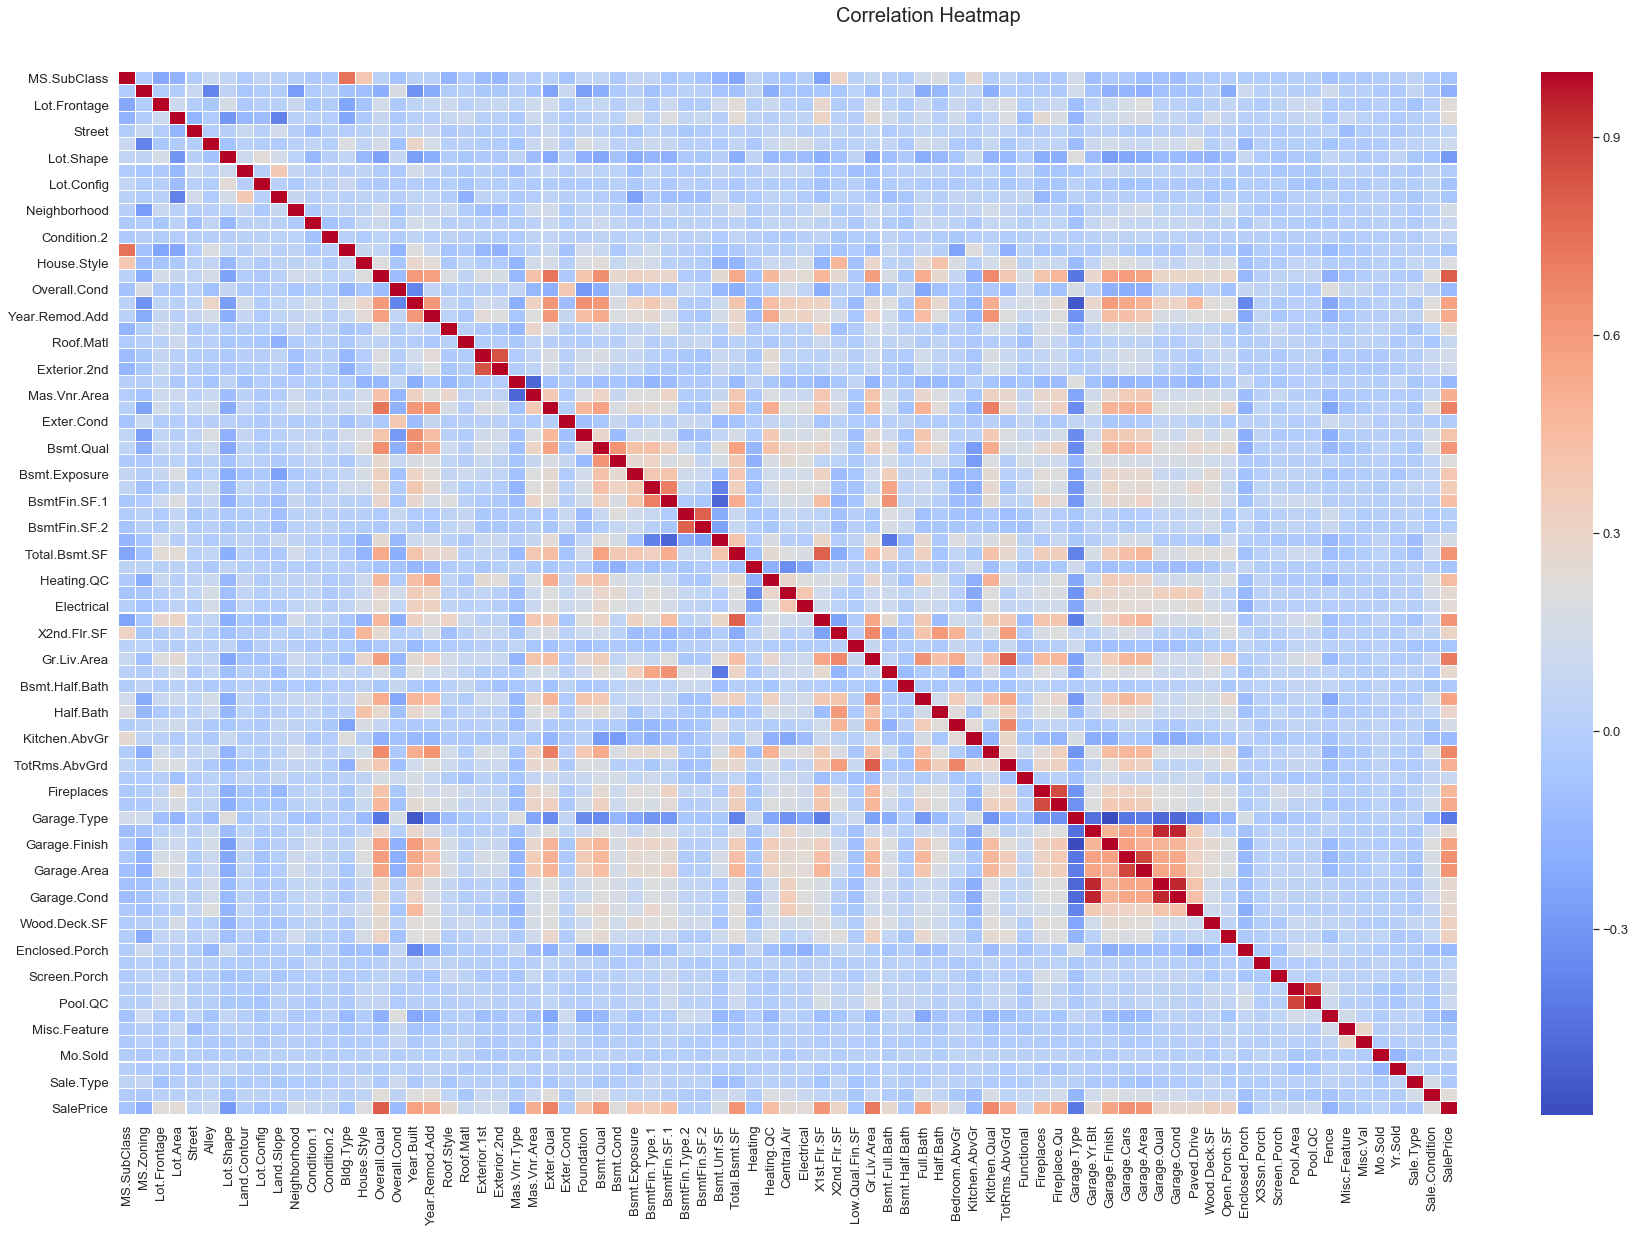

In [39]:
# Przegląd zmiennych pod względem wzajemnych korelacji
sns.set(style='darkgrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(30, 18))
sns.heatmap(df_data.corr(), annot=False, cmap="coolwarm",fmt='.2f',linewidths=.05 )
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlation Heatmap', fontsize=20)
plt.show()

> Wynika z tego, że nie ma mocnych korelacji różnych zmiennych między sobą, skorelowane są zmienne opisujące podobne elementy nieruchomości. Wyjątkiem tu są zmienne 'Year.Built' i 'Enclosed.Porch' (Przeszklona weranda) , które mogą wynikć z pewej mody w w budownictwie; ale i tak ta ostatnia zmienna nie ma istotnego wpływu na cenę. 

> Można zauważyć, że z 'SalePrice' są istotnie skorelowane 'Overall.Qual', 'Gr.Liv.Area' i 'Garage.Area', jak i w dalszym stopniu ok.13 innych zmiennych, razem ok. 16.

In [40]:
# weryfikuje stopnie korelacji ze zmienna 'SalePrice'
df_colsCorr = pd.DataFrame(df_data.corr().SalePrice.sort_values())
df_colsCorr

,SalePrice
Garage.Type,-0.421114
Lot.Shape,-0.285217
MS.Zoning,-0.176420
Fence,-0.157293
Mas.Vnr.Type,-0.134250
Kitchen.AbvGr,-0.129682
Enclosed.Porch,-0.128352
Overall.Cond,-0.120190
MS.SubClass,-0.075202
Heating,-0.073884


In [41]:
# okreslam ktore kolumny maja korelacje > 0.60 i tworze dla nich wykresy zaleznosci
df_colsCorr60 = df_colsCorr[df_colsCorr['SalePrice']>0.60]
df_colsCorr60

,SalePrice
Bsmt.Qual,0.616290
X1st.Flr.SF,0.619121
Total.Bsmt.SF,0.623371
Garage.Area,0.628159
Garage.Cars,0.635605
Kitchen.Qual,0.668868
Exter.Qual,0.691842
Gr.Liv.Area,0.720922
Overall.Qual,0.804547
SalePrice,1.000000


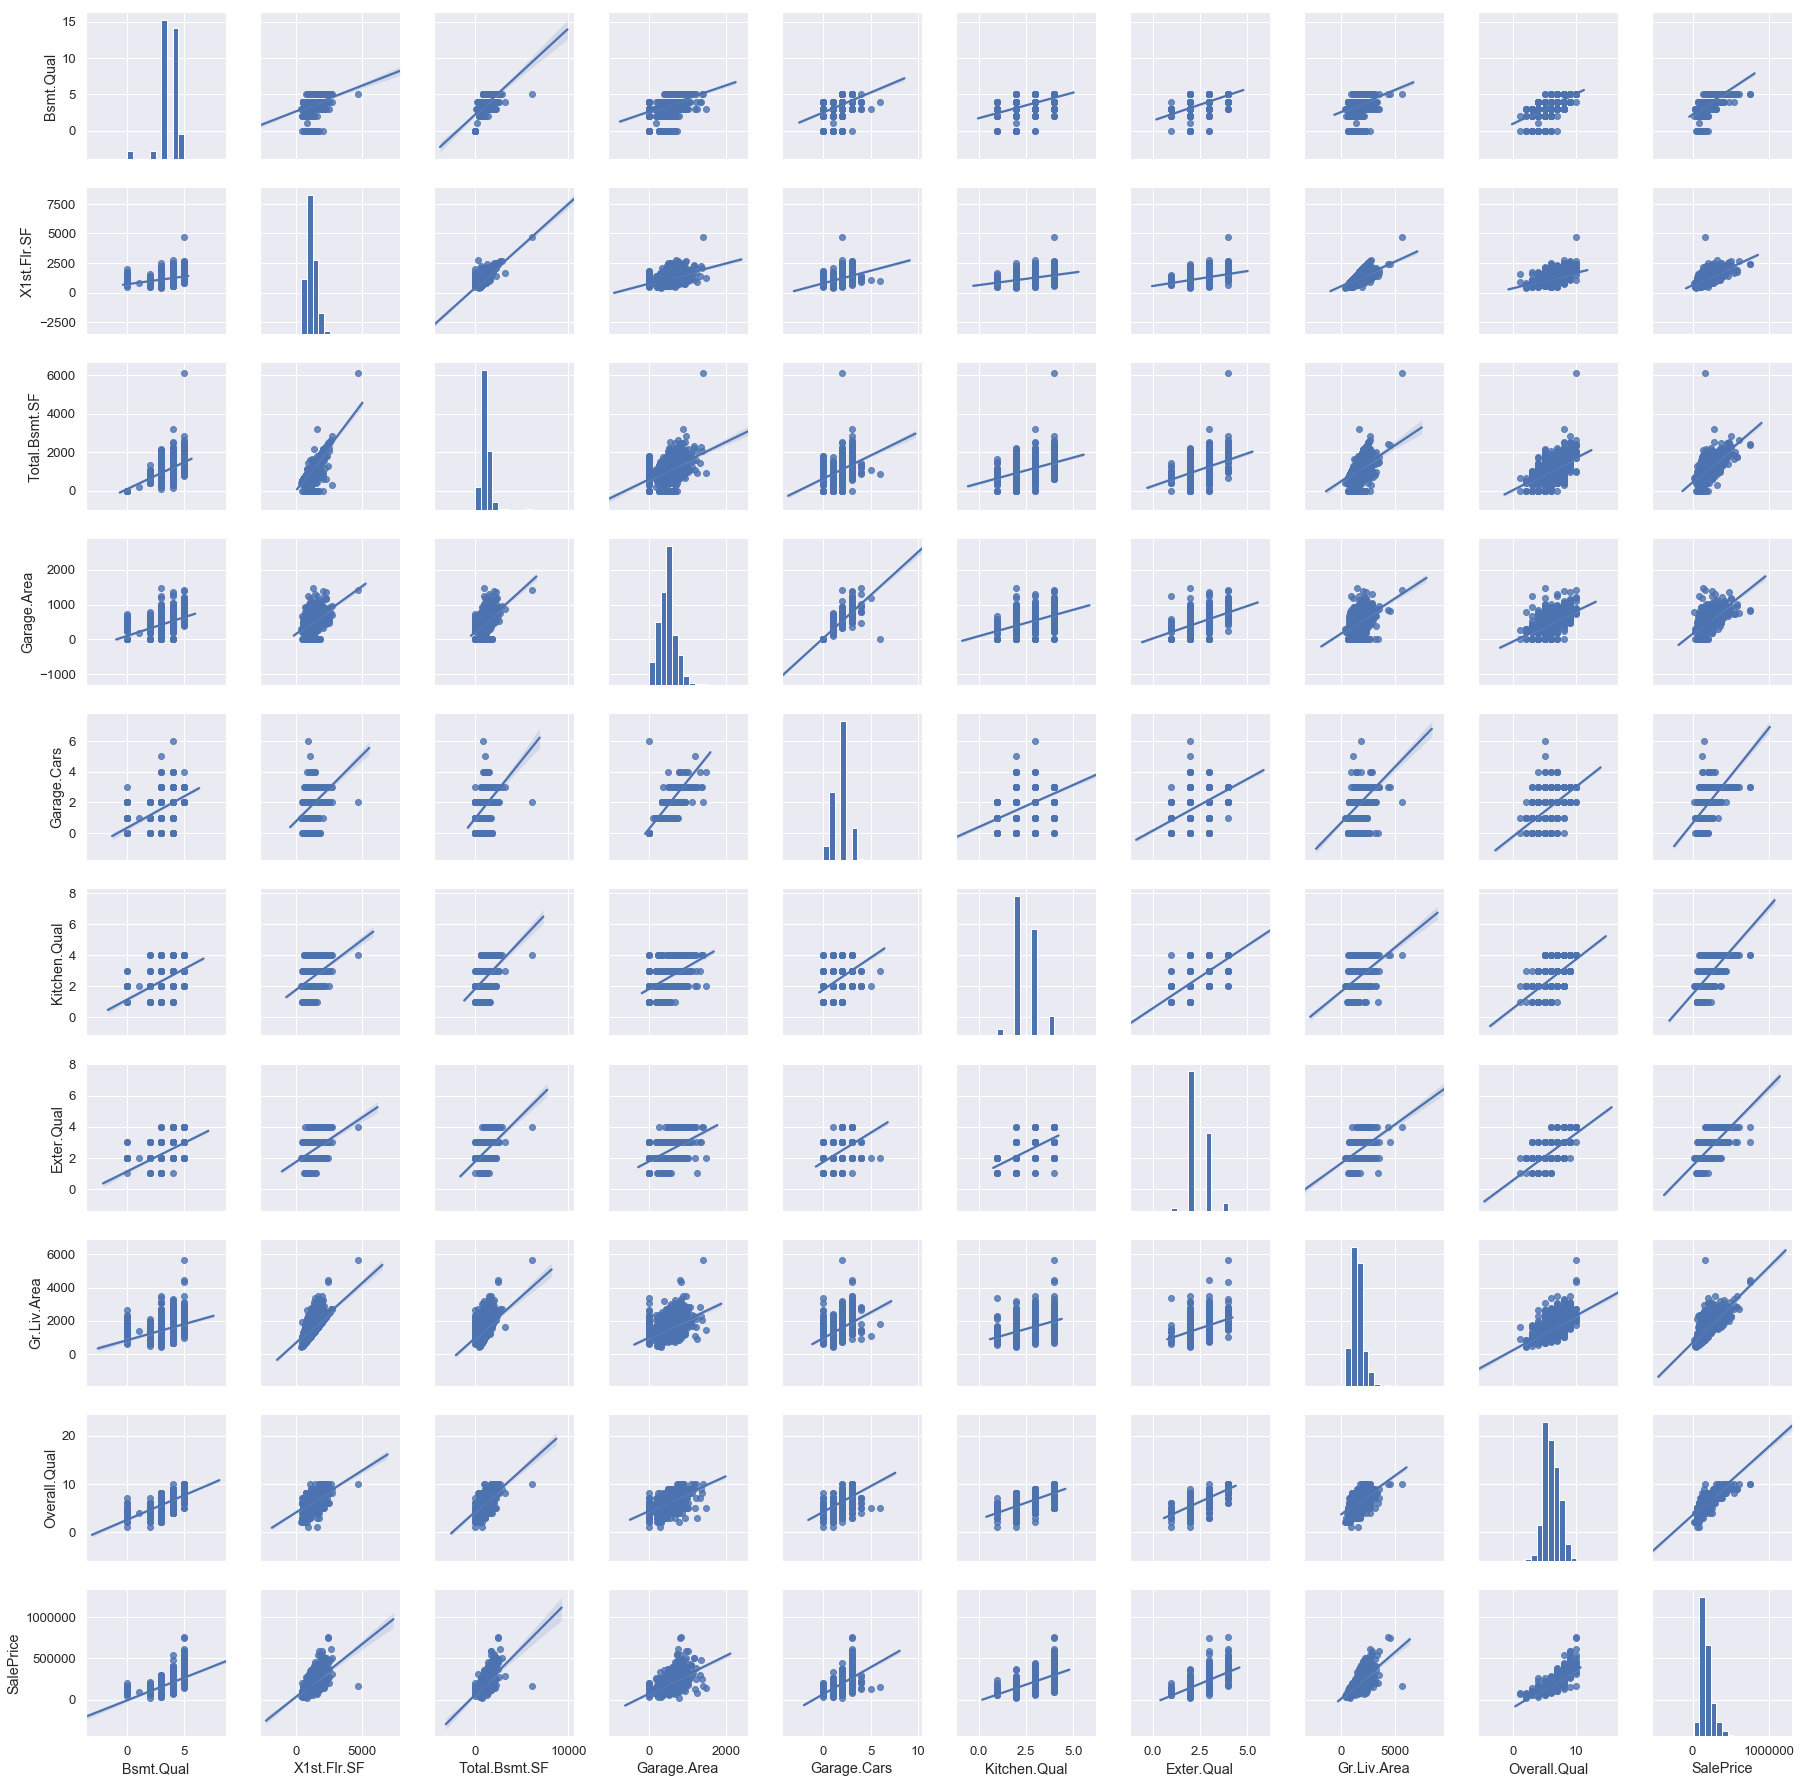

In [42]:
# przeglad zaleznosci pomiedzy kolumnami najbardziej skorelowanymi z 'SalePrice'
sns.pairplot(df_data[df_colsCorr60.index], kind="reg")

#### Podział na zbiory testowe i treningowe

In [43]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [44]:
# dziele zbiory na zmienna objasniana, ktora jest 'SalePrice' i pozostale zmienne ja objasniajace
X = df_data.drop(["SalePrice"], axis=1)
y = df_data["SalePrice"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X_train", X_train.shape, "\tX_test", X_test.shape, "\ty_train", y_train.shape, "\ty_test", y_test.shape)

X_train (1400, 78) 	X_test (600, 78) 	y_train (1400,) 	y_test (600,)


    Przed przystąpieniem do dalszego etapów badam skośność wartości zmiennej objaśnianej

#### Badanie skośności

In [45]:
import scipy.stats as stats

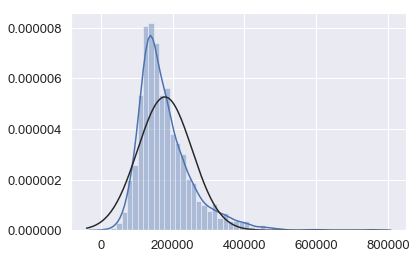

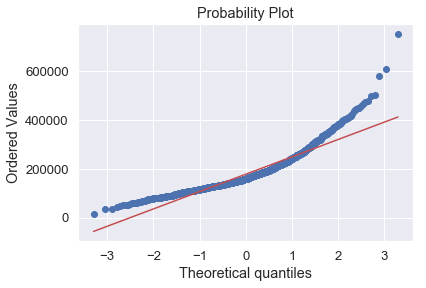

In [46]:
sns.distplot(y_train, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

> Wynika z tego, że 'SalePrice' jest prawostronnie skośna

    Dla potrzeb modelowania zlogarytmizuję warości zmiennej objaśnianej treningowej i testowej, i zweryfikuję słuszność tego podejścia na wykresie

In [47]:
# logarytmizacja zmiennej objasnianej
y_train = np.log(y_train)
y_test = np.log(y_test)

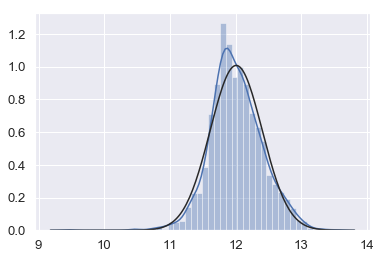

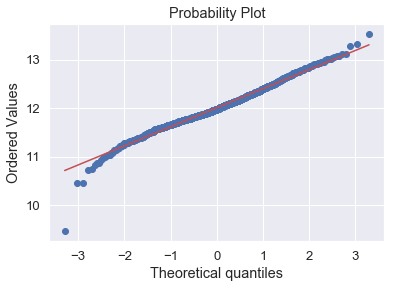

In [48]:
# weryfikaja na wykresie zlogarytmizowanej zmiennej treningowej
sns.distplot(y_train, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

> Po zlogarytmowaniu rozkład wartości zmiennej jest już zbliżony do symetrycznego rozkładu normalnego 

#### Określenie liczby komponentów

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [50]:
X_train.shape

(1400, 78)

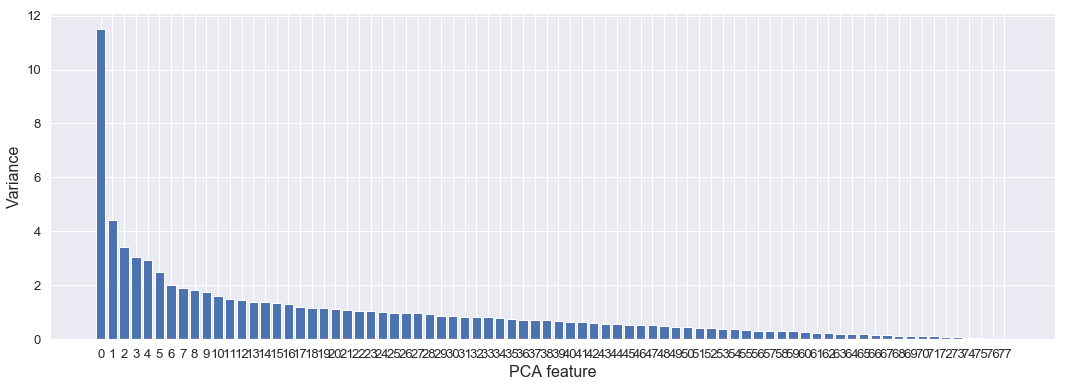

In [51]:
# wykres dla wszystkich mozliwych komponentow 
pca = PCA(78)
make_pipeline(StandardScaler(), pca).fit(X_train, y_train)
features = range(pca.n_components_)
plt.figure(figsize=(18,6))
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA feature", fontsize=16)
plt.ylabel("Variance", fontsize=16)
plt.xticks(features)
plt.show()

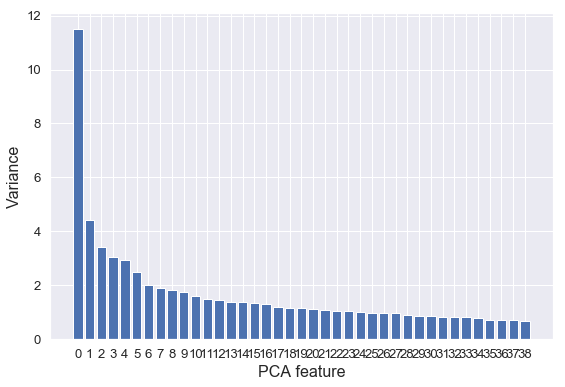

In [52]:
# wykres dla polowy komponentow
pca = PCA(39)
make_pipeline(StandardScaler(), pca).fit(X_train, y_train)
features = range(pca.n_components_)
plt.figure(figsize=(9,6))
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA feature", fontsize=16)
plt.ylabel("Variance", fontsize=16)
plt.xticks(features)
plt.show()

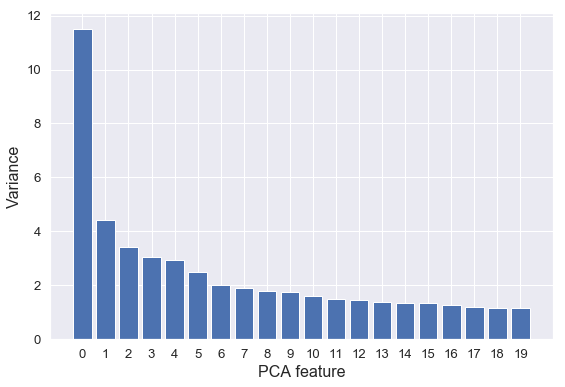

In [53]:
# wykres dla 20 komponentow
pca = PCA(20)
make_pipeline(StandardScaler(), pca).fit(X_train, y_train)
features = range(pca.n_components_)
plt.figure(figsize=(9,6))
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA feature", fontsize=16)
plt.ylabel("Variance", fontsize=16)
plt.xticks(features)
plt.show()

> Do modelowania użyję 16 komponentów, ponieważ przy 10 komponentach wyliczenia efektywności modelowania były istotnie gorsze niż przy 16

#### Podział na podzbiory kroswalidacji i wskazanie ilości komponentów

In [54]:
from sklearn.model_selection import KFold

In [55]:
kfold = KFold(n_splits=5, random_state=42)    # ustawiam 5 podzialow
pca = PCA(random_state=42, n_components=16)    # ustawiam 16 komponentów zgodnie z powyższymi analizami
scaler = StandardScaler()
print("",kfold,"\n",pca,"\n",scaler)

 KFold(n_splits=5, random_state=42, shuffle=False) 
 PCA(copy=True, iterated_power='auto', n_components=16, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False) 
 StandardScaler(copy=True, with_mean=True, with_std=True)


#### Zastosowanie modeli

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

##### Regresja Liniowa

In [57]:
from sklearn import linear_model

In [58]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4]}
polynomialfeatures = PolynomialFeatures()
linearregression = linear_model.LinearRegression()
pipeline = make_pipeline(scaler, pca, polynomialfeatures, linearregression)
grid_lr = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, refit=True, scoring='r2')
grid_lr.fit(X_train,y_train)
print("",grid_lr.best_params_,"\n",metrics.r2_score(y_train, grid_lr.predict(X_train)))

 {'polynomialfeatures__degree': 1} 
 0.8752745317575601


##### ElasticNet

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4], 'elasticnet__alpha': [0.001, 0.01, 0.05, 0.1, 1, 10]}
polynomialfeatures = PolynomialFeatures()
elasticnet = ElasticNet(tol=0.1, random_state=42)
pipeline = make_pipeline(scaler, pca, polynomialfeatures, elasticnet)
grid_en = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, refit=True, scoring='r2')
grid_en.fit(X_train,y_train)
print("",grid_en.best_params_,"\n",metrics.r2_score(y_train, grid_en.predict(X_train)))

 {'elasticnet__alpha': 0.01, 'polynomialfeatures__degree': 2} 
 0.8993525543362483


##### Ridge

In [61]:
from sklearn.linear_model import Ridge

In [62]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4], 'ridge__alpha': [1, 10, 50, 100, 500, 1000]}
polynomialfeatures = PolynomialFeatures()
ridge = Ridge(random_state=42)
pipeline = make_pipeline(scaler, pca, polynomialfeatures, ridge)
grid_rdg = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, refit=True, scoring='r2')
grid_rdg.fit(X_train,y_train)
print("",grid_rdg.best_params_,"\n",metrics.r2_score(y_train, grid_rdg.predict(X_train)))

 {'polynomialfeatures__degree': 1, 'ridge__alpha': 50} 
 0.8752575876259929


##### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
param_grid = {'randomforestregressor__n_estimators': [250, 500, 750, 1000], 
              'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']}
rfc = RandomForestRegressor(n_jobs=-1, oob_score = True, random_state=42) 
pipeline = make_pipeline(scaler, pca, rfc)
grid_rf = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfold, refit=True, scoring='r2')
grid_rf.fit(X_train,y_train)
print("",grid_rf.best_params_,"\n",metrics.r2_score(y_train, grid_rf.predict(X_train)))

 {'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 750} 
 0.9751798144015684


#### Weryfikacja modeli

##### Weryfikacja parametrów jakości modeli

In [65]:
l_models = []
l_models.append(('LinearRegression', grid_lr.best_estimator_))
l_models.append(('ElasticNet', grid_en.best_estimator_))
l_models.append(('Ridge', grid_rdg.best_estimator_))
l_models.append(('RandomForestRegressor', grid_rf.best_estimator_))

In [66]:
r2_train = []
r2_test = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in l_models:
    r2_train.append(metrics.r2_score(y_train, model.predict(X_train)))
    r2_test.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

In [67]:
df_models = pd.DataFrame(data=l_models)
df_models.rename({0 : 'Name', 1 : 'Model'}, axis = 1, inplace=True)
df_models.drop(labels=['Model'], axis=1, inplace=True)
df_models.set_index('Name', inplace=True)
df_models['R2 (train)'] = r2_train
df_models['R2 (test)'] = r2_test
df_models['(EVS)  Explained variance score (test)'] = explained_variance_score
df_models['(MedAE)  Median absolute error (test)'] = median_absolute_error
df_models['(MSE)  Mean squared error (test)'] = mean_squared_error
df_models['(MAE)  Mean absolute errors (test)'] = mean_absolute_error
df_models

,R2 (train),R2 (test),(EVS) Explained variance score (test),(MedAE) Median absolute error (test),(MSE) Mean squared error (test),(MAE) Mean absolute errors (test)
Name,,,,,,
LinearRegression,0.875275,0.837068,0.837494,0.077903,0.027336,0.103834
ElasticNet,0.899353,0.845466,0.845784,0.072694,0.025927,0.098813
Ridge,0.875258,0.837671,0.838101,0.077756,0.027235,0.103679
RandomForestRegressor,0.975180,0.883295,0.883763,0.078301,0.019581,0.100420


> - Najlepszym modelem jest 'RandomForestRegressor': Ma najwyższe R2 na danych treningowych i testowych. Rónież wg MSE, które jest najniższe ze wszystkich testowanych modeli. Ma również najlepszy EVS. MAE jest niewiele niższe od ElasticNet, i niższe niż u wyszystkich pozostałych modeli. MedAE jest niewiele wyższe niż w pozostałych modelach.
> - Na drugim miejscu jest 'ElasticNet': Ma drugie R2 zarówno na danych treningowych, jak i testowych. Drugie EVS i MSE po 'RandomForestRegressor', i najniższe MAE i MedAE.
> - Na trzecim miejscu, można uznać że są razem: 'Ridge' i 'LinearRegression'. 

##### Porównanie cen rzeczywistych z cenami wyliczonymi w oparciu o modele

In [68]:
# przygotowanie ramy danych zawierajacej zestawienie cen rzeczywistych i cen wyliczonych w oparciu o zastosowane modele
df_pricesComparison = pd.DataFrame({'Real Price': np.exp(y_test)})
for name, model in l_models:
    a_predictions = model.predict(X_test)
    a_predictions = a_predictions.astype('float')
    a_predictions = np.exp(a_predictions)
    df_modelPrices = pd.DataFrame({"%s Price" %name : a_predictions})
    df_pricesComparison = pd.concat([df_pricesComparison, df_modelPrices], axis=1)
df_pricesComparisonSorted = df_pricesComparison.sort_values(by=['Real Price', 'RandomForestRegressor Price'])
df_pricesComparisonSorted

,Real Price,LinearRegression Price,ElasticNet Price,Ridge Price,RandomForestRegressor Price
476,35311.0,69257.569385,56725.103165,69689.590801,57702.884576
466,55000.0,70415.730832,76135.482645,70538.672540,91270.023683
303,61000.0,58879.652065,49311.776248,59259.073398,68080.254765
522,61500.0,78245.293596,74167.800179,78418.204198,90633.802044
292,63000.0,91750.845020,91095.952249,92038.024910,86938.467111
596,63900.0,57595.011138,63584.417518,57818.055897,76304.331483
514,64000.0,89244.952375,93807.334373,89514.592525,92853.534066
564,64500.0,58259.475799,41799.122163,58624.482080,61765.928844
210,65000.0,93172.026335,92041.326175,93289.224518,97177.285645
429,67000.0,70327.411334,65884.724528,70582.712091,75076.398256


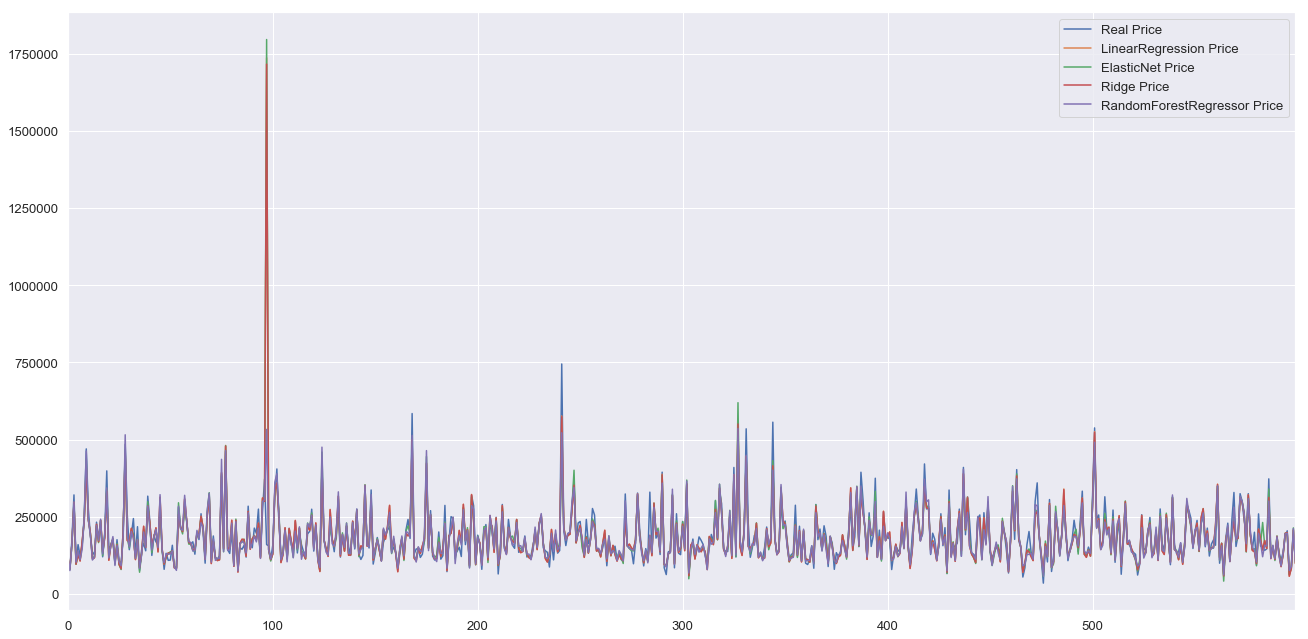

In [69]:
# wykres wartosci rzeczywistych i wyliczonych z modeli
df_pricesComparison.plot(kind='line', figsize=(22,11))

> - Generalnie wskazania modeli są zbliżone do rzeczywistych i można uznać, że ich wartości, zwłaszcza RandomForestRegressor, wizualnie zachodzą na siebie wykazując podobne wartości do rzeczywistych
> - Wyjątkiem jest jedna transakcja, dla której wskazania modeli LinearRegression, ElasticNet i Ridge, a także RandomForestRegresso różnią się znacznie od wartości rzeczywistej